In [0]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import cm
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import interpolate
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Plot numbers without .0. i.e. 1.000 => just 1
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

In [0]:
df_dict = pd.read_excel('https://drive.google.com/u/0/uc?id=1X7McO1BVxzI7ntRDWX3ycpKbFmqVUItg&export=download', header=[0, 1], index_col=0, sheet_name='Sheet2')
df=df_dict.rename_axis((None,None), axis=1)
df.columns.names = ['level', 'eta']
level_l=list(df.columns.get_level_values('level'))
eta_l=list(df.columns.get_level_values('eta'))
level=list(df.columns.get_level_values('level').unique())
eta=list(df.columns.get_level_values('eta').unique())
phi = np.array([.05, .1, .2, .3, .4, .5, .6, .7, .75])
levels_log = np.logspace(np.log10(minErr), np.log10(maxErr), 11) #Log of Error
levels = np.array([-3, -2.6, -2.2, -2, -1.5, -1.2, -1., -0.7, 0]) # log Error 
Nphi=len(phi)
Nlevel=len(level)
Neta=len(eta)
fi=list(df.index)
M = np.array(df).reshape(9, 4, 6) #PHI, LEVEL, ETA
minErr=M.min()
maxErr=M.max()
# df=np.log(df)
df
#df['L=10'][0.01]
#df['L=10'].plot()

level           8                ...           11             
eta   1.000000e-15 1.000000e-06  ... 1.000000e-03 1.000000e-02
0.05      0.012539     0.001954  ...     0.087069     0.540274
0.10      0.004744     0.003472  ...     0.087406     0.512416
0.20      0.002482     0.007217  ...     0.117559     0.543600
0.30      0.007007     0.005005  ...     0.166624     0.618138
0.40      0.001097     0.015274  ...     0.246455     0.718502
0.50      0.008290     0.010900  ...     0.378006     0.823255
0.60      0.042042     0.065689  ...     0.616237     0.919906
0.70      0.034845     0.085666  ...     0.901073     0.984138
0.75      0.279099     0.386388  ...     0.985847     0.997879

[9 rows x 24 columns]

9

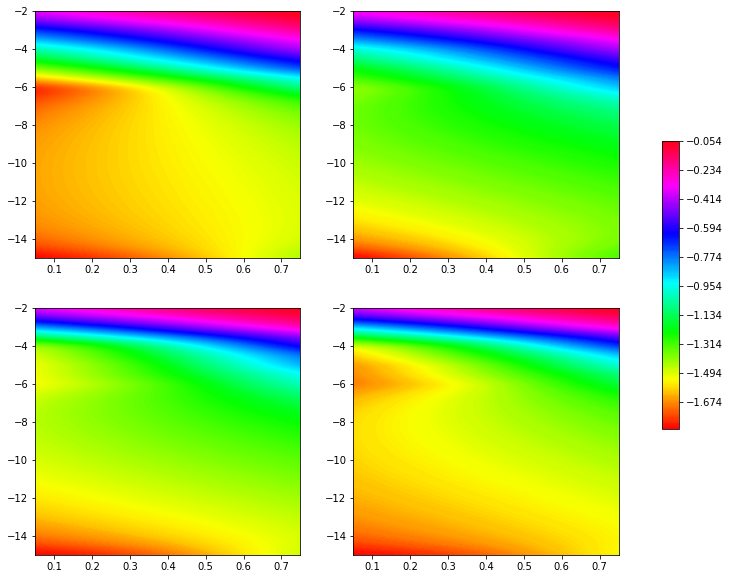

In [0]:


phi = np.array([.05, .1, .2, .3, .4, .5, .6, .7, .75])

x, y = np.meshgrid(phi, np.log10(eta), indexing='ij')

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, a in zip(range(4), ax.reshape(-1, )):
  R0 = interpolate.Rbf(x, y, np.log10(M[:, i, :]), smooth=5)
  N_points = 500
  PHI = np.linspace(np.min(phi), np.max(phi), N_points)
  ETA = np.linspace(np.min(np.log10(eta)), np.max(np.log10(eta)), N_points)
  X, Y = np.meshgrid(PHI, ETA, indexing='ij')
  R = R0(X, Y)
  CS = a.contourf(X, Y, R, levels=300, cmap='hsv')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(CS, cax=cbar_ax);

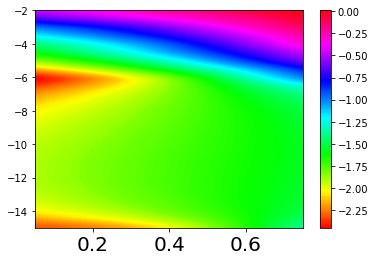

In [0]:
M = np.array(df).reshape(9, 4, 6)

phi = np.array([.05, .1, .2, .3, .4, .5, .6, .7, .75])

x, y = np.meshgrid(phi, np.log10(eta), indexing='ij')
R0 = interpolate.Rbf(x, y, np.log10(M[:, 0, :]), smooth=1)

N_points = 1000
PHI = np.linspace(np.min(phi), np.max(phi), N_points)
ETA = np.linspace(np.min(np.log10(eta)), np.max(np.log10(eta)), N_points)

X, Y = np.meshgrid(PHI, ETA, indexing='ij')

R = R0(X, Y)

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, R, levels=300, cmap='hsv')
fig.colorbar(CS);
#ax.clabel(CS, inline=1, fontsize=10)

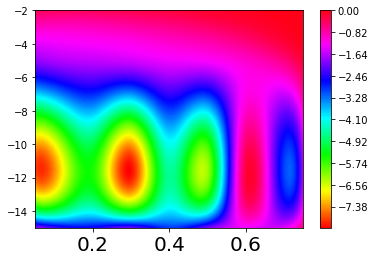

In [0]:
M = np.array(df).reshape(9, 4, 6)


x, y = np.meshgrid(phi, np.log10(eta), indexing='ij')
R0 = interpolate.RectBivariateSpline(phi, np.log10(eta), np.log10(M[:, 0, :]))

N_points = 301
PHI = np.linspace(np.min(phi), np.max(phi), N_points)
ETA = np.linspace(np.min(np.log10(eta)), np.max(np.log10(eta)), N_points)

X, Y = np.meshgrid(PHI, ETA, indexing='ij')
R = R0(X, Y, grid=False)

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, R, levels=500, cmap='hsv')
fig.colorbar(CS)
#ax.clabel(CS, inline=1, fontsize=10)

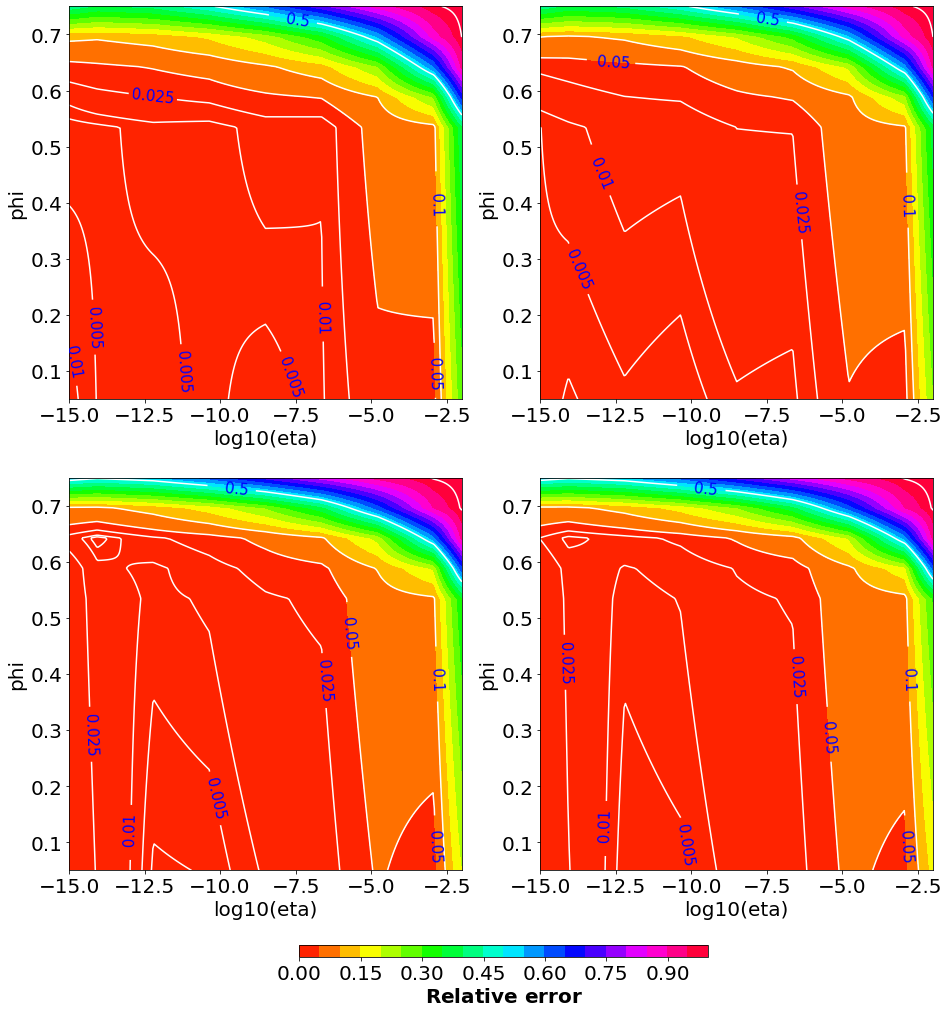

In [0]:
#NOT LOG ERR. ERR(ETA, PHI)
levels = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.1, 0.5, 0.98])
x = np.log10(eta)
y = phi
xx, yy = np.meshgrid(x, y, indexing='ij')
N_points = 301
ETA = np.linspace(np.min(x), np.max(x), N_points)
PHI = np.linspace(np.min(y), np.max(y), N_points)

X, Y = np.meshgrid(ETA, PHI, indexing='ij')

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.subplots_adjust(left=-0.5, right=1.2, bottom=-0.5, top=1)
# Label levels with specially formatted floats
# fmt = ticker.LogFormatterMathtext()
fmt = '%5.3g'
for i, a in zip(range(Nlevel), ax.reshape(-1, )):
  f = interpolate.interp2d(x, y, M[:, i, :], kind='linear')
  # f = interpolate.interp2d(x, y, M[:, i, :], kind='quintic')
  # f = interpolate.interp2d(x, y, M[:, i, :], kind='cubic')
  R = f(ETA, PHI)
  CSF = a.contourf(X, Y, R, levels=np.linspace(0, 1, 21), cmap='hsv')
  CS = a.contour(X, Y, R, levels, colors='w')#cmap='hsv'
  # Recast levels to new class
  CS.levels = [nf(val) for val in CS.levels]
  a.set_xlabel('log10(eta)')
  a.set_ylabel('phi')
  a.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=15, colors='b')

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
# fig.colorbar(CSF, cax=cbar_ax);
# cbar_ax.set_ylabel(r"$\bf{Relative\ error}$",  labelpad=20, rotation=270)  
fig.subplots_adjust(right=1)
cbar_ax = fig.add_axes([-0.1, -0.65, 0.71, 0.02])
fig.colorbar(CSF, cax=cbar_ax, orientation='horizontal');
cbar_ax.set_xlabel(r"$\bf{Relative\ error}$")  

###
plt.savefig('contours4L_NOT_LOG_ERR.pdf', bbox_inches = 'tight')

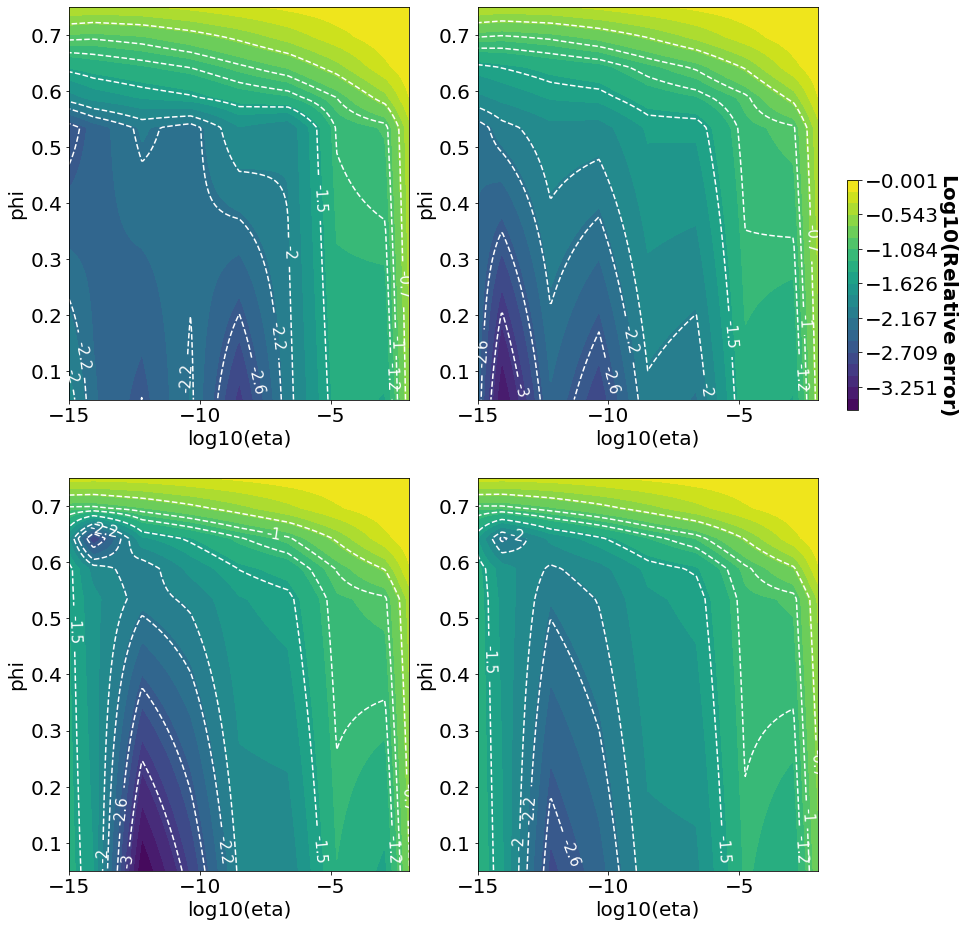

In [0]:
#LOG ERR. ERR(ETA, PHI)
phi = np.array([.05, .1, .2, .3, .4, .5, .6, .7, .75])
levels = np.array([-3, -2.6, -2.2, -2, -1.5, -1.2, -1., -0.7, 0]) # log Error 
x = np.log10(eta)
y = phi
xx, yy = np.meshgrid(x, y, indexing='ij')
N_points = 301
ETA = np.linspace(np.min(x), np.max(x), N_points)
PHI = np.linspace(np.min(y), np.max(y), N_points)

X, Y = np.meshgrid(ETA, PHI, indexing='ij')

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.subplots_adjust(left=-0.5, right=1.2, bottom=-0.5, top=1)
# Label levels with specially formatted floats
fmt = '%r'
for i, a in zip(range(Nlevel), ax.reshape(-1, )):
  f = interpolate.interp2d(x, y, np.log10(M[:, i, :]), kind='linear')
  # f = interpolate.interp2d(x, y, np.log10(M[:, i, :]), kind='quintic')
  # f = interpolate.interp2d(x, y, np.log10(M[:, i, :]), kind='cubic')
  R = f(ETA, PHI)
  CSF = a.contourf(X, Y, R, levels=np.linspace(np.log10(minErr), np.log10(maxErr),21))
  CS = a.contour(X, Y, R, levels, colors='w')#cmap='hsv'
  # Recast levels to new class
  CS.levels = [nf(val) for val in CS.levels]
  a.set_xlabel('log10(eta)')
  a.set_ylabel('phi')
  a.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=15, colors='w')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(CSF, cax=cbar_ax);
cbar_ax.set_ylabel(r"$\bf{Log10(Relative\ error)}$",  labelpad=20, rotation=270)  
###
plt.savefig('contours4L_LOG_ERR.pdf', bbox_inches = 'tight')

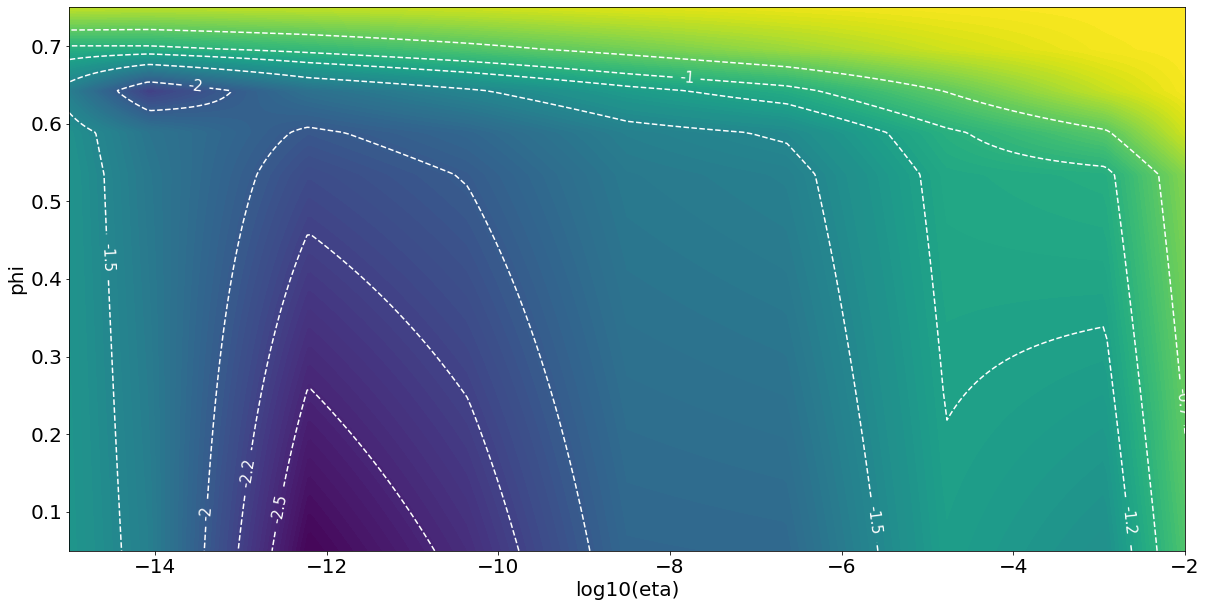

In [0]:
fig, ax = plt.subplots(figsize=(20,10))

levels = np.array([-3, -2.5, -2.25, -2, -1.5, -1.2, -1., -0.7, 0])
CSF = ax.contourf(X,Y,R,levels=100)
CS = ax.contour(X,Y,R,levels,colors='w')
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
ax.set_xlabel('log10(eta)')
ax.set_ylabel('phi')

# Label levels with specially formatted floats
fmt = '%r'
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=15, colors='w')
plt.savefig('test.pdf')

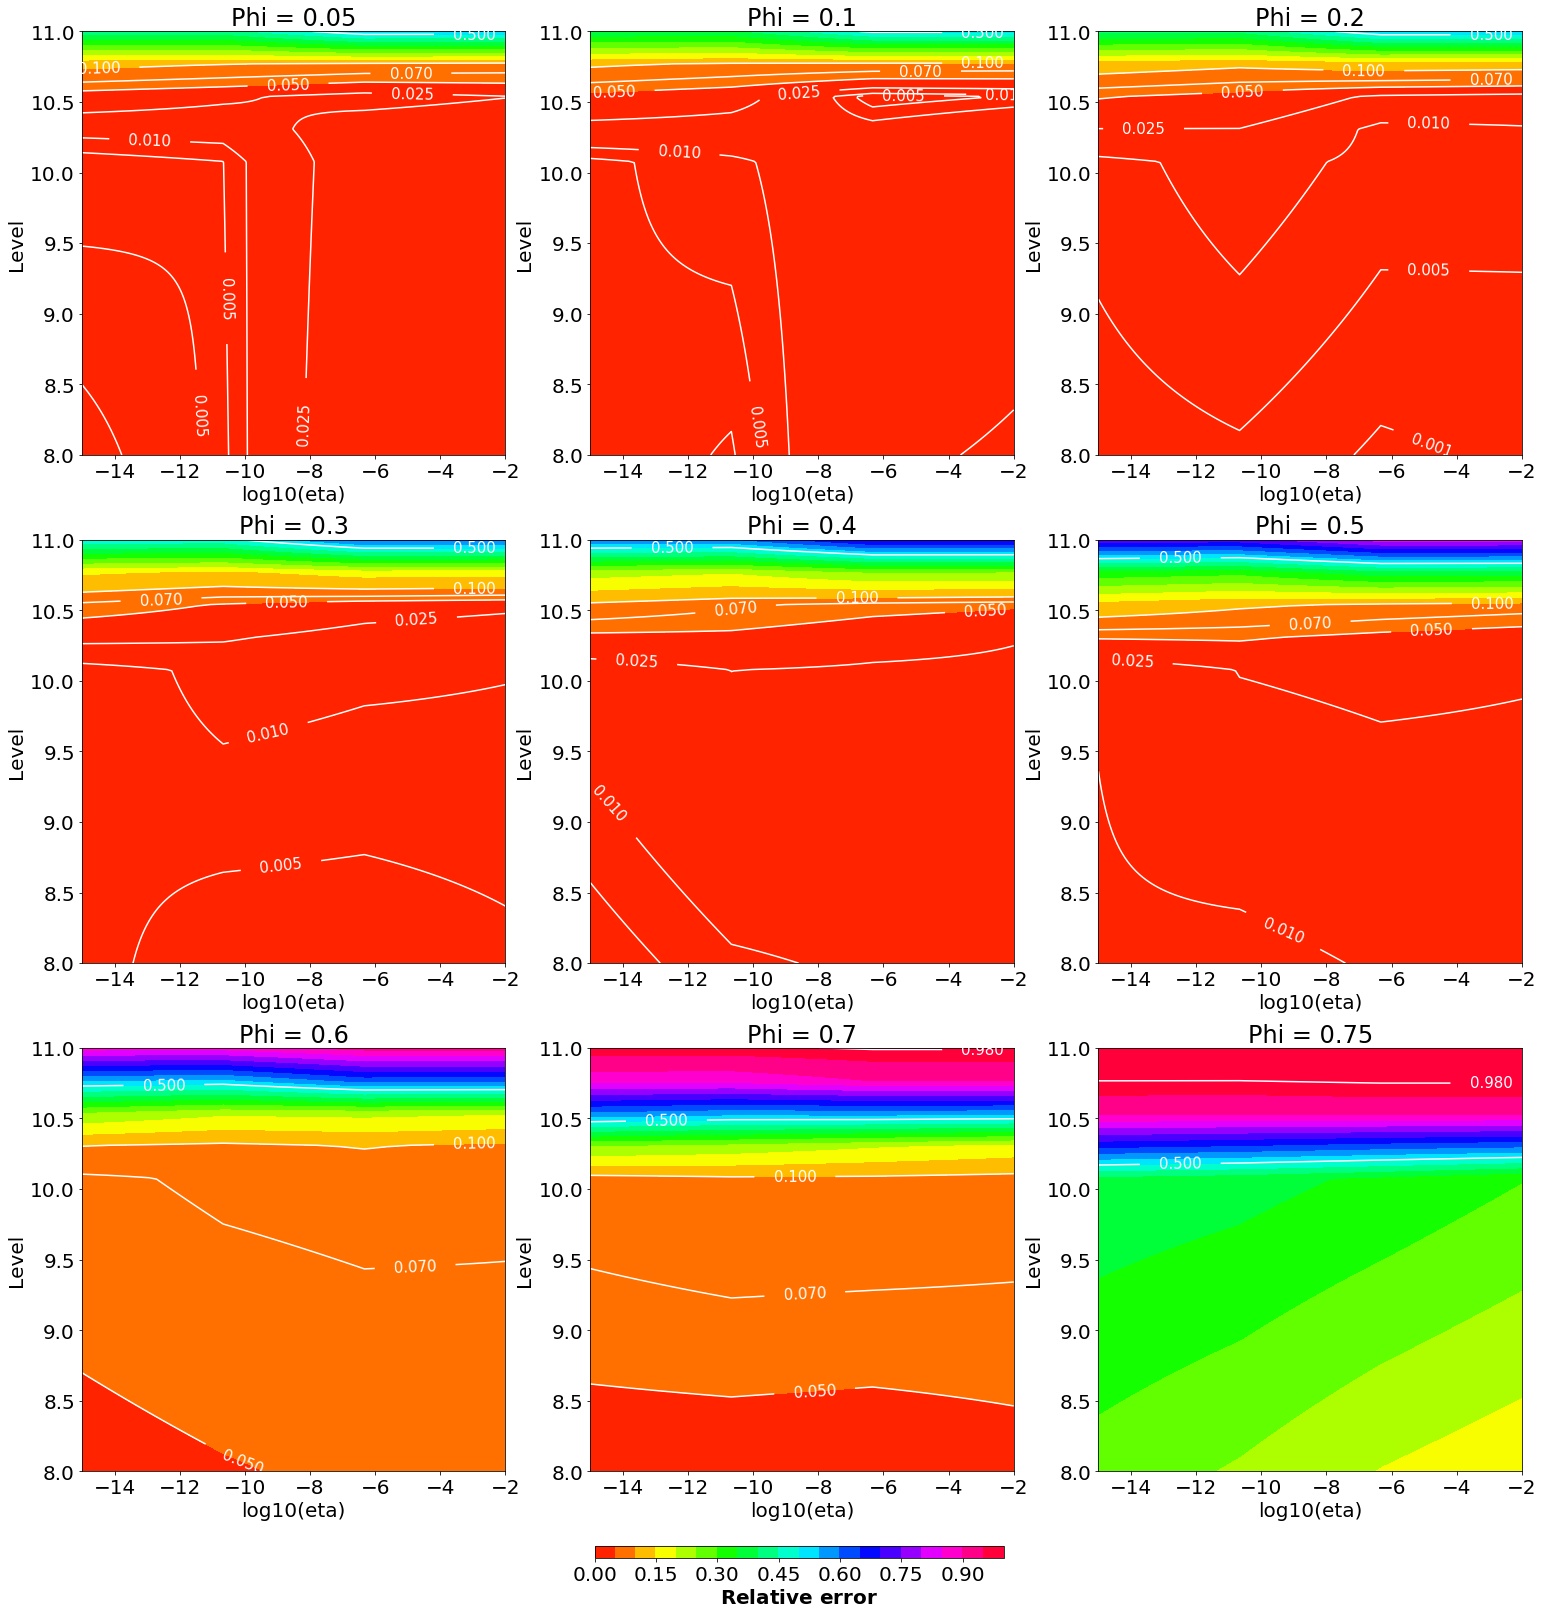

In [0]:
#NOT LOG ERR, ERR(ETA, LEVEL)
levels = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.07, 0.1, 0.5, 0.98])
x = np.log10(eta)
y = level
xx, yy = np.meshgrid(x, y, indexing='ij')
N_points = 301
ETA = np.linspace(np.min(x), np.max(x), N_points)
LEVEL = np.linspace(np.min(y), np.max(y), N_points)

X, Y = np.meshgrid(ETA, LEVEL, indexing='ij')

fig, ax = plt.subplots(3, 3, figsize=(8, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.subplots_adjust(left=-0.5, right=1.2, bottom=-0.5, top=1)
# Label levels with specially formatted floats
fmt = '%5.3f'
for i, a in zip(range(Nphi), ax.reshape(-1, )):
  f = interpolate.interp2d(x, y, M[i, :, :], kind='linear')
  # f = interpolate.interp2d(x, y, M[i, :, :], kind='quintic')
  # f = interpolate.interp2d(x, y, M[i, :, :], kind='cubic')
  R = f(ETA, LEVEL)
  CSF = a.contourf(X, Y, R, levels=np.linspace(0, 1, 21), cmap='hsv')
  CS = a.contour(X, Y, R, levels, colors='w')#cmap='hsv'
  # Recast levels to new class
  CS.levels = [nf(val) for val in CS.levels]
  a.set_xlabel('log10(eta)')
  a.set_ylabel('Level')
  a.title.set_text('Phi = ' + str(phi[i]))
  a.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=15, colors='w')


fig.subplots_adjust(right=2, top=2)
cbar_ax = fig.add_axes([0.39, -0.65, 0.71, 0.02])
fig.colorbar(CSF, cax=cbar_ax, orientation='horizontal');
cbar_ax.set_xlabel(r"$\bf{Relative\ error}$")  

# sm = plt.cm.ScalarMappable(cmap="hsv", norm=plt.Normalize(vmin=minErr, vmax=maxErr))
# sm.set_array([])
# 
# fig.colorbar(sm, ax=list(ax[1,0:2]),orientation='vertical', pad=0.2)
# cmap = mpl.cm.cool
# norm = mpl.colors.Normalize(vmin=minErr, vmax=maxErr)

# cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
# cb1.set_label('Some Units')

###
plt.savefig('contours9phi_NOT_LOG.pdf', bbox_inches = 'tight')

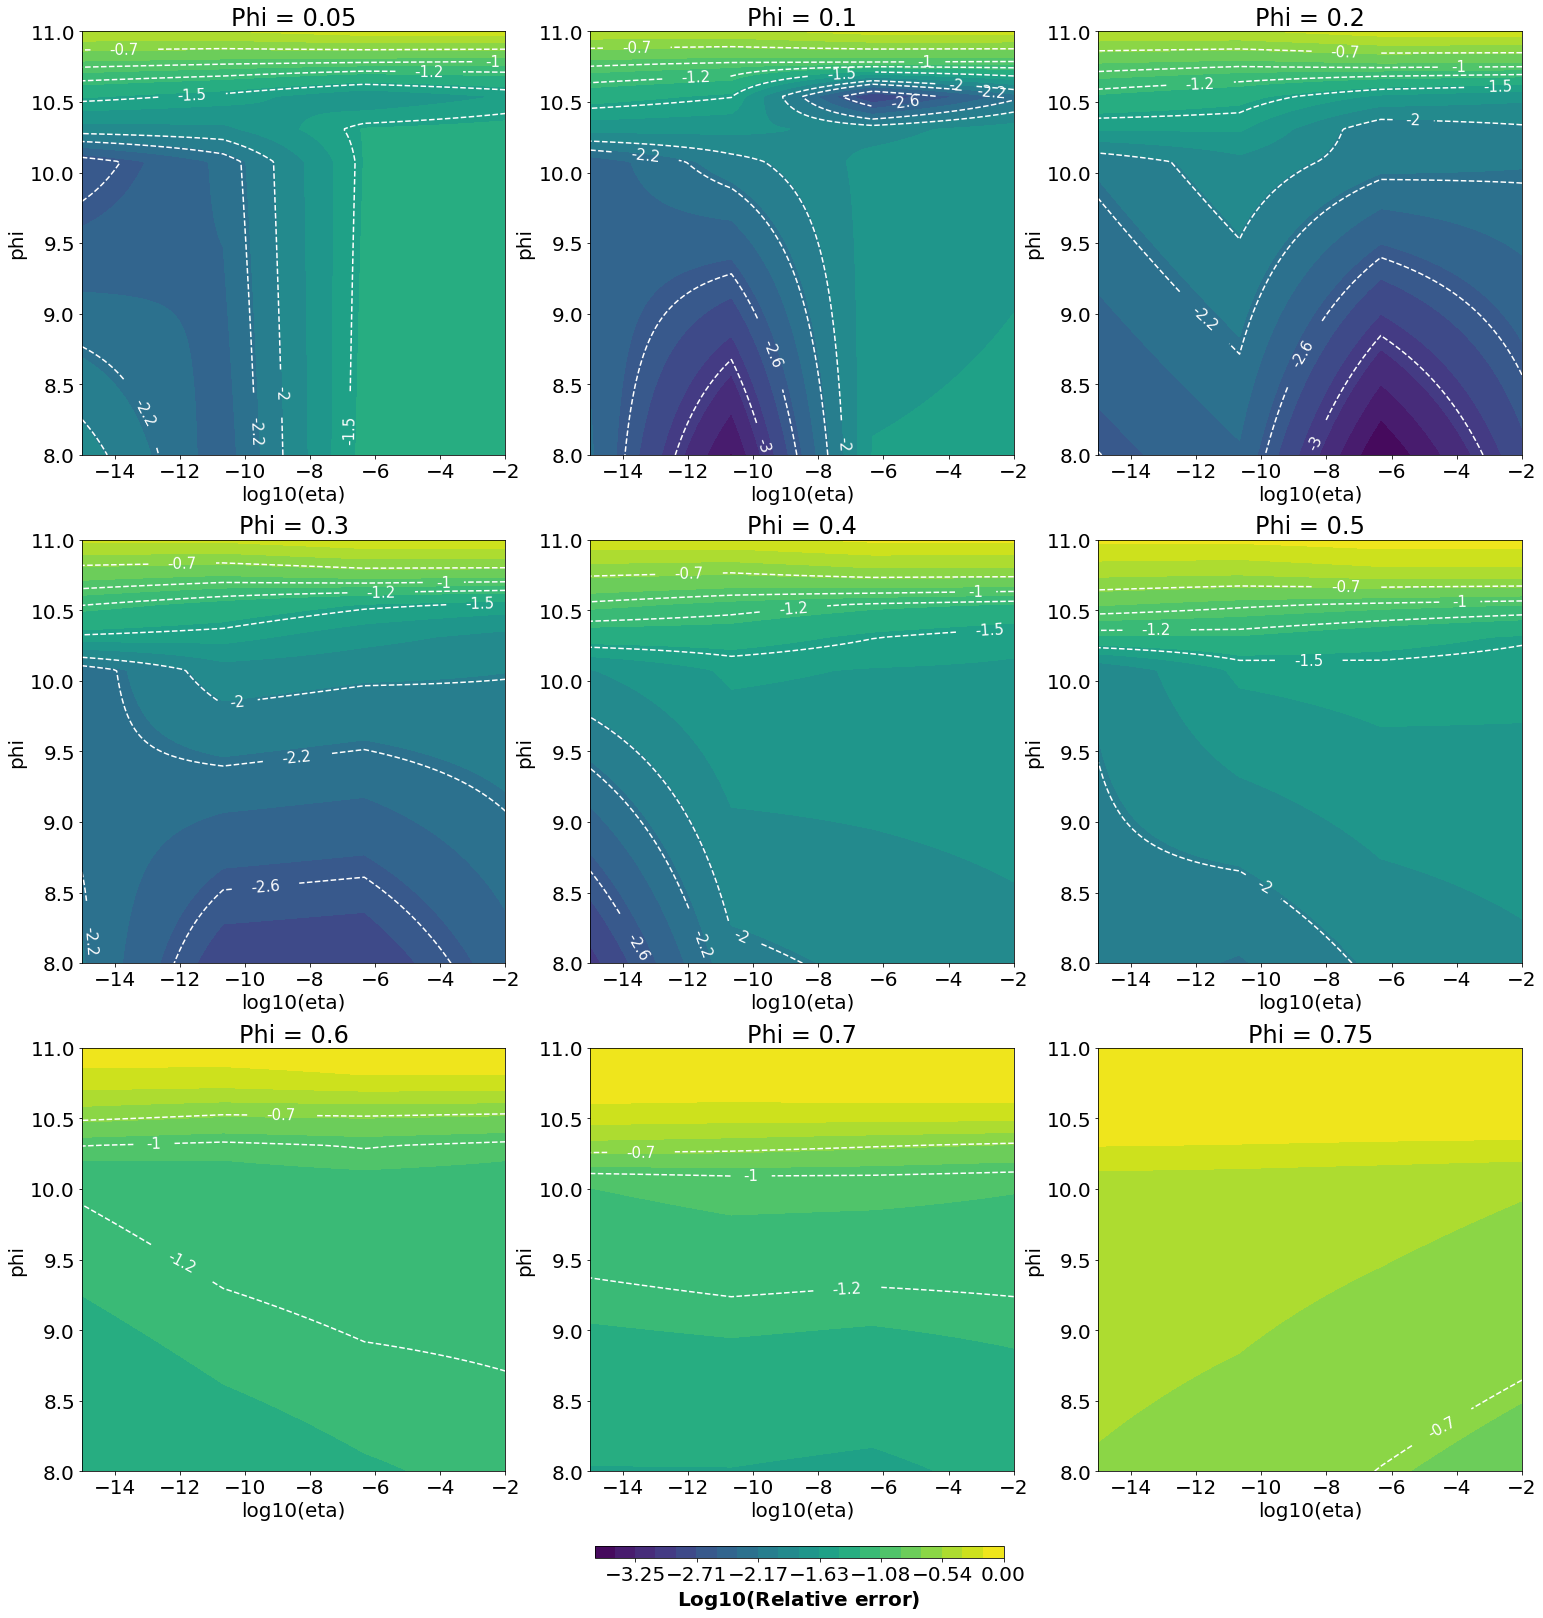

In [172]:
levels = np.array([-3, -2.6, -2.2, -2, -1.5, -1.2, -1., -0.7, 0])
x = np.log10(eta)
y = level
xx, yy = np.meshgrid(x, y, indexing='ij')
N_points = 301
ETA = np.linspace(np.min(x), np.max(x), N_points)
LEVEL = np.linspace(np.min(y), np.max(y), N_points)

X, Y = np.meshgrid(ETA, LEVEL, indexing='ij')

fig, ax = plt.subplots(3, 3, figsize=(8, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.subplots_adjust(left=-0.5, right=1.2, bottom=-0.5, top=1)
# Label levels with specially formatted floats
fmt = '%r'
for i, a in zip(range(Nphi), ax.reshape(-1, )):
  f = interpolate.interp2d(x, y, np.log10(M[i, :, :]), kind='linear')
  # f = interpolate.interp2d(x, y, np.log10(M[i, :, :]), kind='quintic')
  # f = interpolate.interp2d(x, y, np.log10(M[i, :, :]), kind='cubic')
  R = f(ETA, LEVEL)
  CSF = a.contourf(X, Y, R, levels=np.linspace(np.log10(minErr), np.log10(maxErr),21).round(2))
  CS = a.contour(X, Y, R, levels, colors='w')#cmap='hsv'
  # Recast levels to new class
  CS.levels = [nf(val) for val in CS.levels]
  a.set_xlabel('log10(eta)')
  a.set_ylabel('phi')
  a.title.set_text('Phi = ' + str(phi[i]))
  a.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=15, colors='w')

fig.subplots_adjust(right=2, top=2)
cbar_ax = fig.add_axes([0.39, -0.65, 0.71, 0.02])
fig.colorbar(CSF, cax=cbar_ax, orientation='horizontal');
cbar_ax.set_xlabel(r"$\bf{Log10(Relative\ error)}$")  

plt.savefig('contours9phi_LOG_ERR.pdf', bbox_inches = 'tight')
###



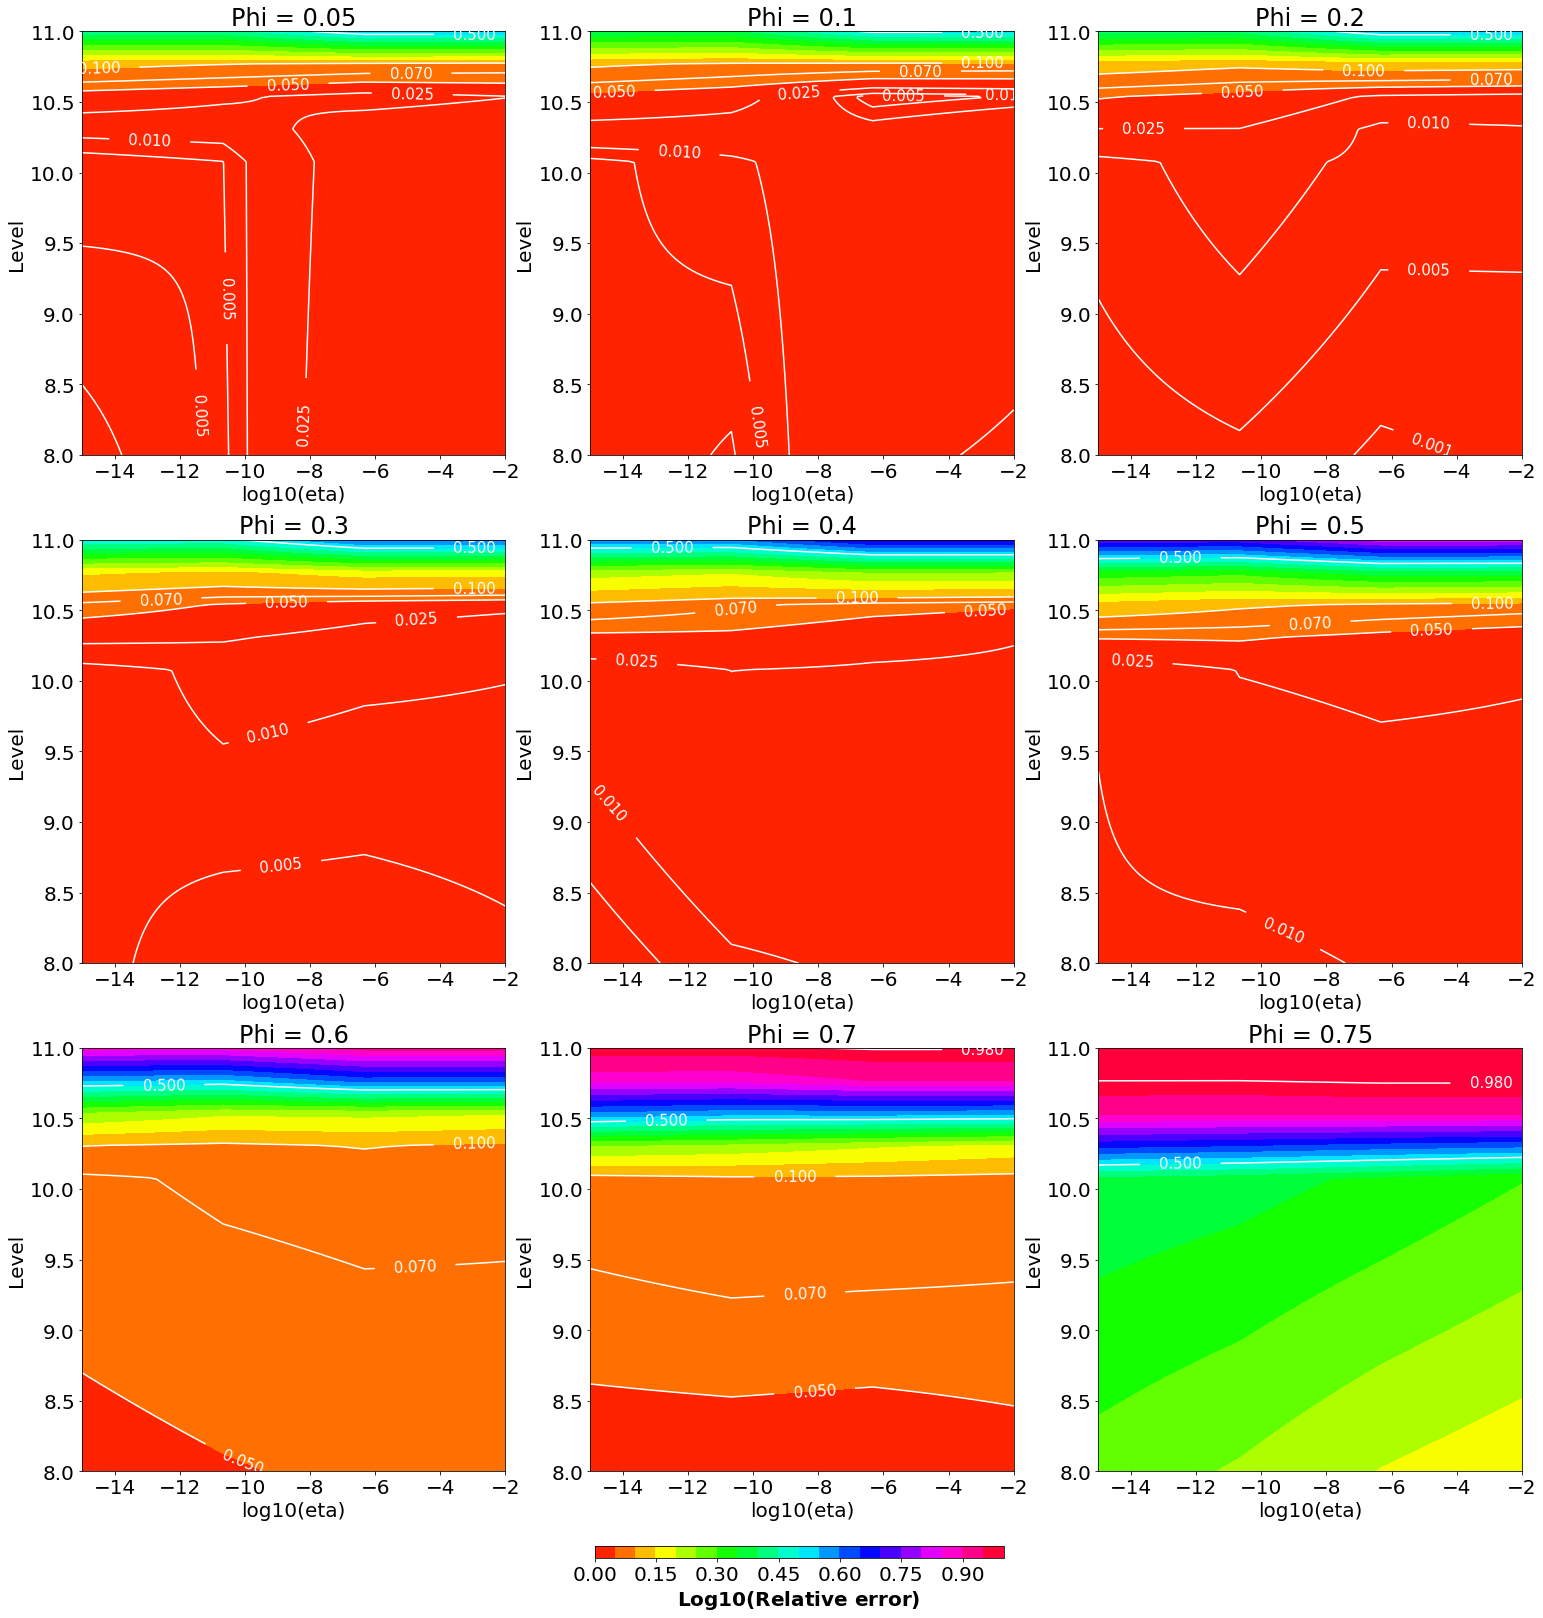

In [0]:
#NOT LOG ERR, ERR(ETA, LEVEL)
levels = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.07, 0.1, 0.5, 0.98])
x = np.log10(eta)
y = level
xx, yy = np.meshgrid(x, y, indexing='ij')
N_points = 301
ETA = np.linspace(np.min(x), np.max(x), N_points)
LEVEL = np.linspace(np.min(y), np.max(y), N_points)

X, Y = np.meshgrid(ETA, LEVEL, indexing='ij')

fig, ax = plt.subplots(3, 3, figsize=(8, 8))
plt.rc('font', size=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.subplots_adjust(left=-0.5, right=1.2, bottom=-0.5, top=1)
# Label levels with specially formatted floats
fmt = '%5.3f'
for i, a in zip(range(Nphi), ax.reshape(-1, )):
  f = interpolate.interp2d(x, y, M[i, :, :], kind='linear')
  # f = interpolate.interp2d(x, y, M[i, :, :], kind='quintic')
  # f = interpolate.interp2d(x, y, M[i, :, :], kind='cubic')
  R = f(ETA, LEVEL)
  CSF = a.contourf(X, Y, R, levels=np.linspace(0, 1, 21), cmap='hsv')
  CS = a.contour(X, Y, R, levels, colors='w')#cmap='hsv'
  # Recast levels to new class
  CS.levels = [nf(val) for val in CS.levels]
  a.set_xlabel('log10(eta)')
  a.set_ylabel('Level')
  a.title.set_text('Phi = ' + str(phi[i]))
  a.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=15, colors='w')

# fig.subplots_adjust(right=2, top=2)
# cbar_ax = fig.add_axes([2.05, 0.3, 0.02, 0.4])
# fig.colorbar(CSF, cax=cbar_ax);
# cbar_ax.set_ylabel(r"$\bf{Log10(Relative\ error)}$",  labelpad=20, rotation=270) 

fig.subplots_adjust(right=2, top=2)
cbar_ax = fig.add_axes([0.39, -0.65, 0.71, 0.02])
fig.colorbar(CSF, cax=cbar_ax, orientation='horizontal');
cbar_ax.set_xlabel(r"$\bf{Log10(Relative\ error)}$")  

# sm = plt.cm.ScalarMappable(cmap="hsv", norm=plt.Normalize(vmin=minErr, vmax=maxErr))
# sm.set_array([])
# 
# fig.colorbar(sm, ax=list(ax[1,0:2]),orientation='vertical', pad=0.2)
# cmap = mpl.cm.cool
# norm = mpl.colors.Normalize(vmin=minErr, vmax=maxErr)

# cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
# cb1.set_label('Some Units')

###
plt.savefig('contours9phi_NOT_LOG.pdf', bbox_inches = 'tight')

In [0]:
# Make a 3d plot according to data passed as arguments  
def Plot3DMap( self, LabelX, XRange, LabelY, YRange, LabelZ, data3d ) :
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot( 111, projection="3d" )
#     ax.set_zscale('log')
    xs, ys =  np.meshgrid( XRange, YRange )
    surf = ax.plot_surface( xs, ys, data3d )
    
    ax.scatter3D(xs.flatten(), ys.flatten(), data3d.flatten(), c=data3d.flatten(), cmap='Reds');
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot(level_l, eta_l, Z, linestyle="none", marker="o", mfc="none", markeredgecolor="red")
    ax.set_xlabel( LabelX )
    ax.set_ylabel( LabelY )
    ax.set_zlabel( LabelZ )
    ax.set_zlim(data3d.min(),data3d.max())
    ax.view_init(30, 120)
    ax.dist = 11
    plt.show()

def Plot3DMapSmooth( self, LabelX, XRange, LabelY, YRange, LabelZ, data3d ) :
#     fig = px.figure(figsize=(16,10))
#     ax = fig.add_subplot( 111, projection="3d" )
    xi = np.linspace(min(XRange),max(XRange),100)
    yi = np.linspace(min(YRange),max(YRange),100)
    X, Y = np.meshgrid(xi, yi)
# VERY IMPORTANT, to tell matplotlib how is your data organized
    zi = griddata((XRange, YRange), data3d.flatten(), (X, Y), method='cubic')

    fig = go.Figure(data=[go.Scatter3d(x=XRange, y=YRange, z=data3d.flatten(), mode='markers'),
                          go.Surface(x=X, y=Y, z=zi.flatten())])
    fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),scene = dict(
                    xaxis_title='level',
                    yaxis_title='log10 eta',
                    zaxis_title='log Err',
                    xaxis = dict(nticks=4, range=[min(XRange),max(XRange)],),
                    yaxis = dict(nticks=4, range=[min(YRange),max(YRange)],),
                    zaxis = dict(nticks=4, range=[Z.min(), Z.max()],),),)
    fig.show()
    
Z=np.zeros([Nlevel,Neta])
for i in range(0,Nlevel):
    Z[i,:]=df.loc[0.5][level[i]]

# Plot3DMap('self', 'log10 eta', np.log10(eta), 'Level', level, 'log10 Error', np.log10(Z))
Plot3DMapSmooth('self', 'log10 eta', np.log10(eta_l), 'Level', level_l, 'log10 Error', np.log10(Z))

In [0]:
minErr, maxErr, np.log10(minErr), np.log10(maxErr)

(0.0002445177566465953,
 0.9978785114806017,
 -3.6116895973435446,
 -0.0009223294593711897)

In [0]:
levels_log

array([2.44517757e-04, 6.15895124e-04, 1.55132621e-03, 3.90750455e-03,
       9.84228315e-03, 2.47908957e-02, 6.24436932e-02, 1.57284144e-01,
       3.96169746e-01, 9.97878511e-01])

In [0]:
levels.round(3)

array([0.001, 0.005, 0.01 , 0.025, 0.05 , 0.07 , 0.1  , 0.5  , 0.98 ])

In [0]:
# !pip install plotly

In [0]:
def ToDataFrame(df, fi):
    Narr=['eta']
    arr=[]
    for i in range(0,Neta):
        arr.append(np.insert(df.loc[fi][:,eta[i]].values, 0, eta[i], axis=0))
    for j in range(0,Nlevel):
            Narr.append(level[j])
    xx = pd.DataFrame(arr, columns=list(Narr))
    return xx.set_index('eta')
xx=ToDataFrame(df,0.4)

In [0]:
fig = go.Figure(data=[go.Scatter3d(x=eta_l, y=level_l, z=xx.values.flatten(), mode='markers'), 
                      go.Surface(x=eta, y=level, z=xx.values)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),scene = dict(
                    xaxis_title='level',
                    yaxis_title='log10 eta',
                    zaxis_title='log Err'))

fig.show()

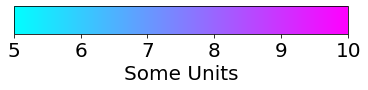

In [0]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

In [0]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 23, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23'],
      dtype='object')

<a list of 6 text.Text objects>

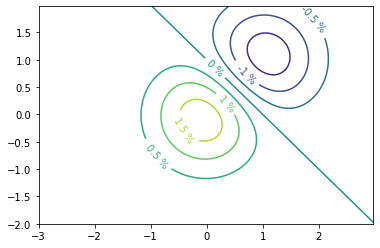

In [0]:
import matplotlib
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'


class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'

ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

In [0]:
CS.levels

[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]